## Problem Statement 

In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset uisng XGBoost.

In [1]:
# Importing the necessary library 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from xgboost.sklearn import XGBClassifier
from sklearn import metrics

In [2]:
#checking the memory-size of the dataset
pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None).info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 20.2 MB


The given train dataset takes total of 20.2MB of memory 

In [3]:
test_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',header=None,skiprows=1)

In [4]:
test_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
0     16281 non-null int64
1     16281 non-null object
2     16281 non-null int64
3     16281 non-null object
4     16281 non-null int64
5     16281 non-null object
6     16281 non-null object
7     16281 non-null object
8     16281 non-null object
9     16281 non-null object
10    16281 non-null int64
11    16281 non-null int64
12    16281 non-null int64
13    16281 non-null object
14    16281 non-null object
dtypes: int64(6), object(9)
memory usage: 10.1 MB


The given test dataset takes total of 10.1MB of memory 

## Load the dataSets 

In [84]:
train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)

In [85]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [86]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [87]:
test_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',header=None,skiprows=1)

In [88]:
test_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
0     16281 non-null int64
1     16281 non-null object
2     16281 non-null int64
3     16281 non-null object
4     16281 non-null int64
5     16281 non-null object
6     16281 non-null object
7     16281 non-null object
8     16281 non-null object
9     16281 non-null object
10    16281 non-null int64
11    16281 non-null int64
12    16281 non-null int64
13    16281 non-null object
14    16281 non-null object
dtypes: int64(6), object(9)
memory usage: 10.1 MB


In [89]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [90]:
# Changing the Columns names
column_Names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex',
                'capital-gain','capital-loss','hours-per-week','native-country','wage_class']

In [91]:
train_data.columns = column_Names

In [92]:
test_data.columns = column_Names

In [93]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [94]:
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


## Exploratory Data Analysis 

In [158]:
# Checking for Missing values 
train_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage_class        0
dtype: int64

In [96]:
test_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage_class        0
dtype: int64

There are no missing values in the datasets

In [97]:
print("Number of Rows and columns in Train dataset are",train_data.shape)

Number of Rows and columns in Train dataset are (32561, 15)


In [98]:
print("Number of Rows and columns in Train dataset are",test_data.shape)

Number of Rows and columns in Train dataset are (16281, 15)


In [99]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [100]:
# Finding the numerical coumns and object columns in train dataset
train_data.count(numeric_only=True).count()

6

In [101]:
train_data.shape[1]-train_data.count(numeric_only=True).count()

9

In [102]:
# Total number of numerical columns present in dataset is 6
# Total number of categorical columns present in dataset is 9

In [103]:
train_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [104]:
train_data.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,wage_class
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [105]:
# Sex column has 2 unique values
train_data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [106]:
# Target variable (Wage_class) has 2 unique values
train_data['wage_class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [107]:
#native-country has 42 unique values
train_data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [108]:
# Race has 5 unique values
train_data['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [109]:
# Occupation has 15 unique values
train_data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [110]:
# Relationship has 6 unique values
train_data['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [111]:
# Marital-status has 7 unique values
train_data['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [112]:
# Education has 16 unique values 
train_data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [113]:
# Workclass has 9 unique values
train_data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [114]:
test_data['workclass'].unique()

array([' Private', ' Local-gov', ' ?', ' Self-emp-not-inc',
       ' Federal-gov', ' State-gov', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [115]:
test_data['wage_class'].unique()

array([' <=50K.', ' >50K.'], dtype=object)

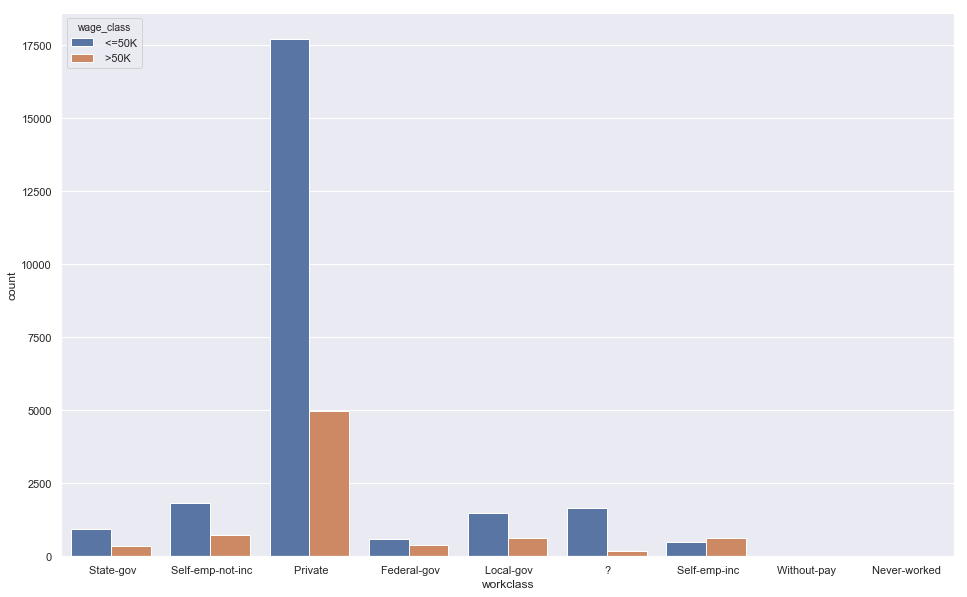

In [116]:
# For Train Dataset
plt.figure(figsize=(16,10))
sns.set(style="darkgrid")
sns.countplot(x='workclass',hue='wage_class',data=train_data)
plt.show()

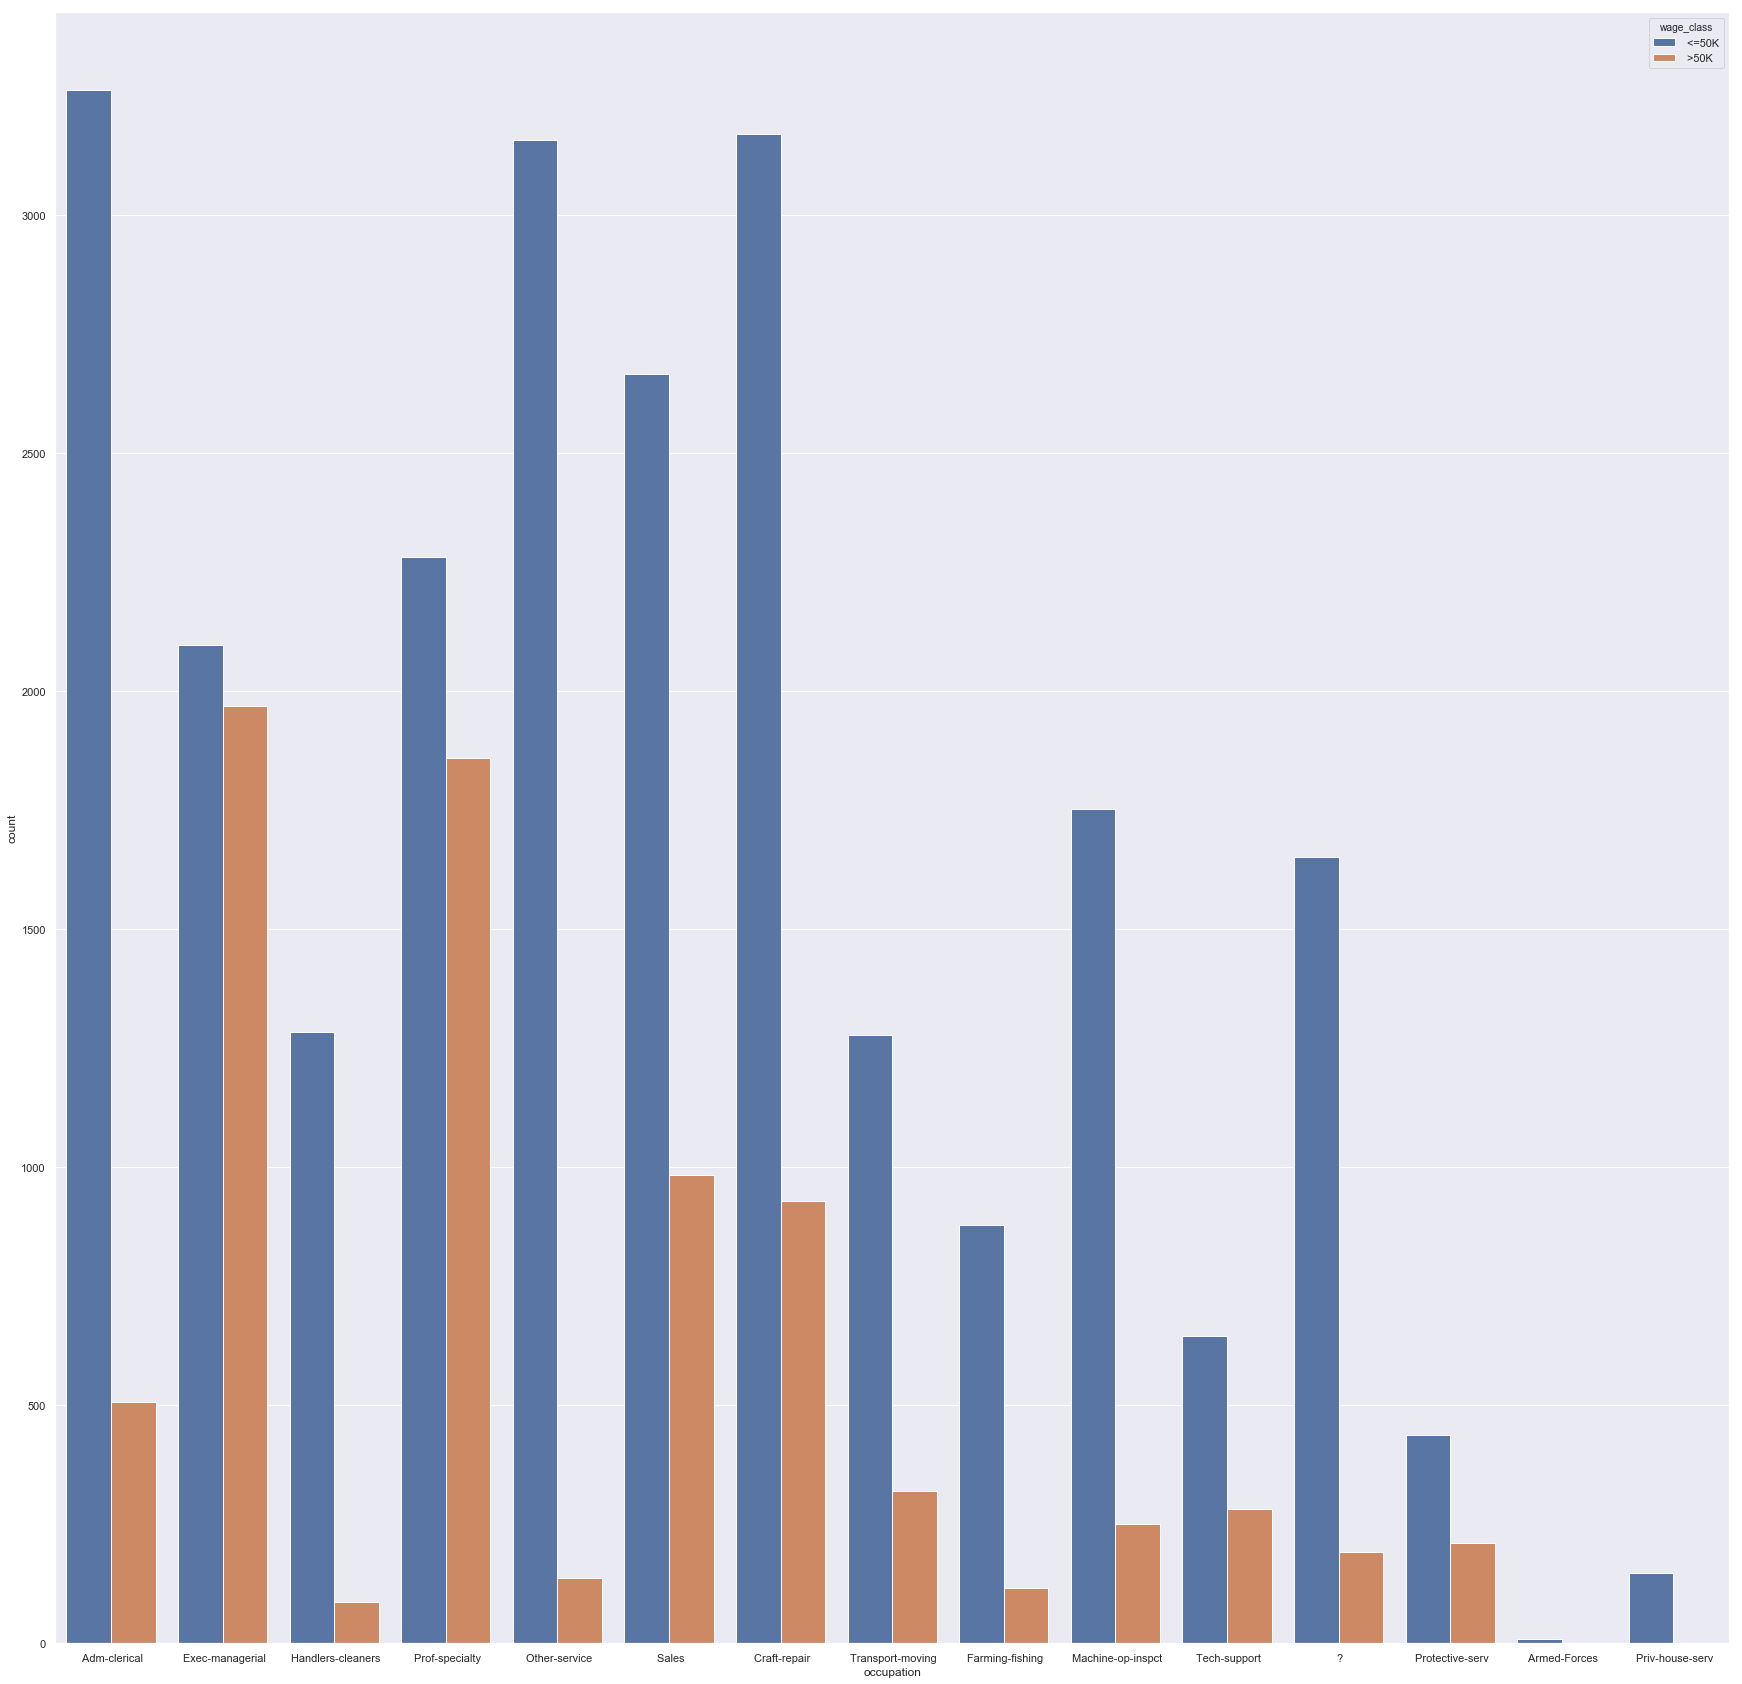

In [117]:
plt.figure(figsize=(30,30))
sns.set(style="darkgrid")
sns.countplot(x='occupation',hue='wage_class',data=train_data)
plt.show()

In [118]:
train_data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [119]:
pd.crosstab(train_data['wage_class'],train_data['workclass'])

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
wage_class,,,,,,,,,
<=50K,1645,589,1476,7,17733,494,1817,945,14
>50K,191,371,617,0,4963,622,724,353,0


In [120]:
pd.crosstab(train_data['wage_class'],train_data['occupation'])

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
wage_class,,,,,,,,,,,,,,,
<=50K,1652,3263,8,3170,2098,879,1284,1752,3158,148,2281,438,2667,645,1277
>50K,191,507,1,929,1968,115,86,250,137,1,1859,211,983,283,320


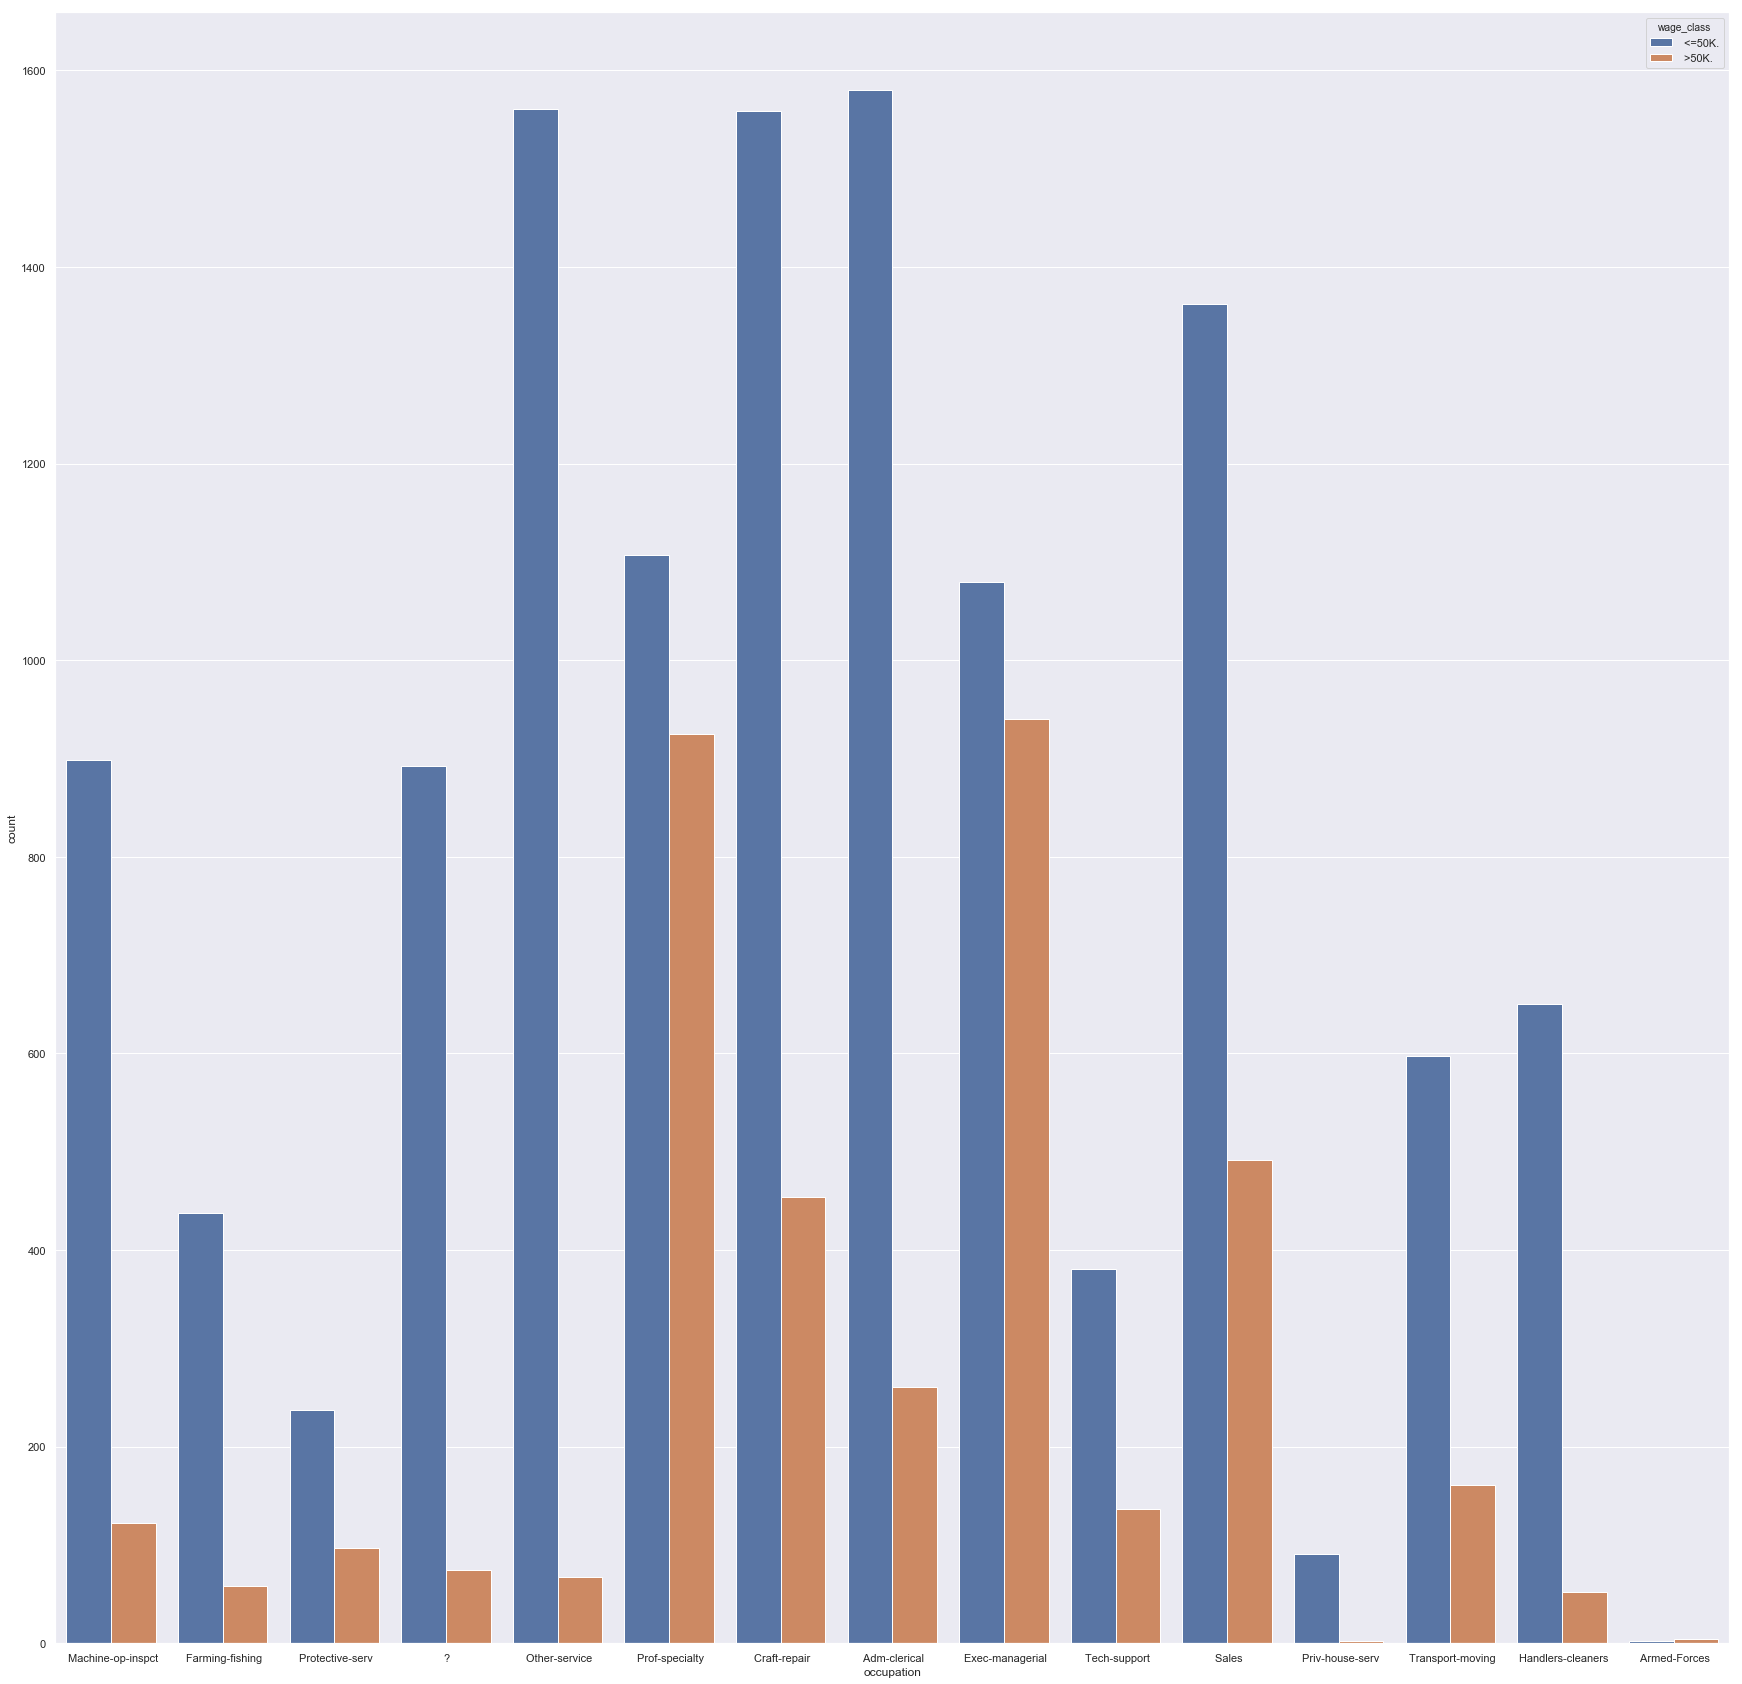

In [121]:
# For test datasets
plt.figure(figsize=(30,30))
sns.set(style="darkgrid")
sns.countplot(x='occupation',hue='wage_class',data=test_data)
plt.show()

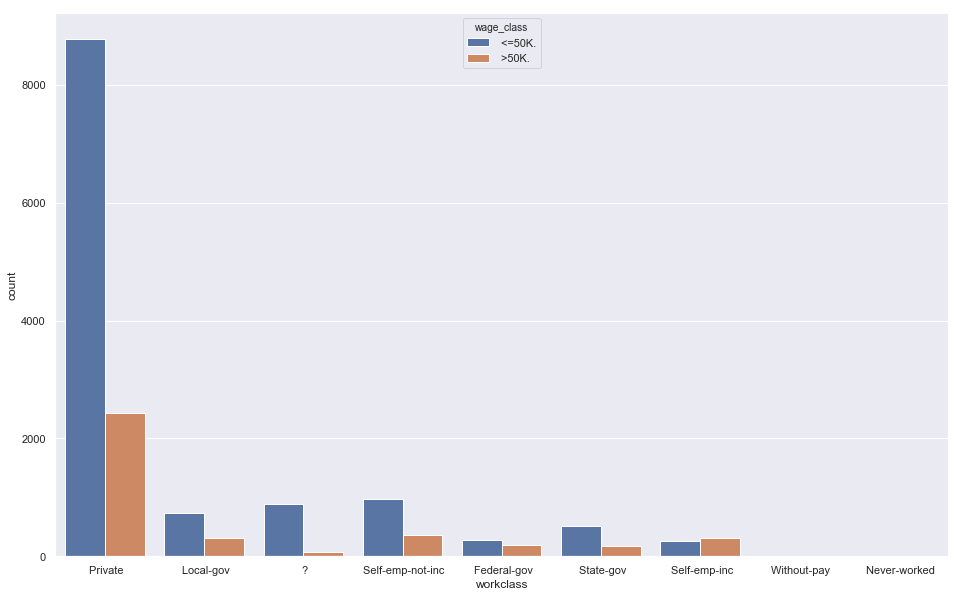

In [122]:
# For Test Dataset
plt.figure(figsize=(16,10))
sns.set(style="darkgrid")
sns.countplot(x='workclass',hue='wage_class',data=test_data)
plt.show()

In [123]:
test_data['occupation'].value_counts()

 Prof-specialty       2032
 Exec-managerial      2020
 Craft-repair         2013
 Sales                1854
 Adm-clerical         1841
 Other-service        1628
 Machine-op-inspct    1020
 ?                     966
 Transport-moving      758
 Handlers-cleaners     702
 Tech-support          518
 Farming-fishing       496
 Protective-serv       334
 Priv-house-serv        93
 Armed-Forces            6
Name: occupation, dtype: int64

In [124]:
pd.crosstab(test_data['wage_class'],test_data['occupation'])

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
wage_class,,,,,,,,,,,,,,,
<=50K.,892,1580,2,1559,1080,438,650,898,1561,91,1107,237,1362,381,597
>50K.,74,261,4,454,940,58,52,122,67,2,925,97,492,137,161


In [125]:
train_data[train_data['workclass']==' ?'].count()

age               1836
workclass         1836
fnlwgt            1836
education         1836
education-num     1836
marital-status    1836
occupation        1836
relationship      1836
race              1836
sex               1836
capital-gain      1836
capital-loss      1836
hours-per-week    1836
native-country    1836
wage_class        1836
dtype: int64

## Removing the rows which are filled with '?'

In [126]:
# Removing the symbols from train dataset
train_data.replace(' ?',np.nan,inplace=True)

In [127]:
train_data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
wage_class           0
dtype: int64

In [128]:
train_data.dropna(inplace=True)

In [129]:
train_data.shape

(30162, 15)

In [130]:
train_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage_class        0
dtype: int64

In [131]:
# Removing the symbols from test dataset

test_data.replace(' ?',np.nan,inplace=True)

In [132]:
test_data.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
wage_class          0
dtype: int64

In [133]:
test_data.dropna(inplace=True)

In [134]:
test_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage_class        0
dtype: int64

In [135]:
#Lets make the 1 hot encoding 
sex_dummies= pd.get_dummies(train_data["sex"], prefix='sex')
workclass_dummies= pd.get_dummies(train_data["workclass"], prefix='workclass')
education_dummies= pd.get_dummies(train_data["education"], prefix='education')
marital_status_dummies= pd.get_dummies(train_data["marital-status"], prefix='marital_status')
occupation_dummies= pd.get_dummies(train_data["occupation"], prefix='occupation')
relationship_dummies= pd.get_dummies(train_data["relationship"], prefix='relationship')
race_dummies= pd.get_dummies(train_data["race"], prefix='race')
native_country_dummies= pd.get_dummies(train_data["native-country"], prefix='native-country')

train_updated_df=pd.concat([train_data,sex_dummies,workclass_dummies, education_dummies,marital_status_dummies,occupation_dummies,relationship_dummies,race_dummies,native_country_dummies])


C:\Users\Satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()
Exception ignored in: <function Booster.__del__ at 0x00000000098C4F28>
Traceback (most recent call last):
  File "C:\Users\Satish\Anaconda3\lib\site-packages\xgboost\core.py", line 892, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'


In [136]:
train_updated_df.head()

,age,capital-gain,capital-loss,education,education-num,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,...,sex_ Male,wage_class,workclass,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,39.0,2174.0,0.0,Bachelors,13.0,NaN,NaN,NaN,NaN,NaN,...,NaN,<=50K,State-gov,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50.0,0.0,0.0,Bachelors,13.0,NaN,NaN,NaN,NaN,NaN,...,NaN,<=50K,Self-emp-not-inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38.0,0.0,0.0,HS-grad,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,<=50K,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53.0,0.0,0.0,11th,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,<=50K,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28.0,0.0,0.0,Bachelors,13.0,NaN,NaN,NaN,NaN,NaN,...,NaN,<=50K,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
train_updated_df = train_updated_df.drop(['wage_class','workclass','education', 
                          'marital-status', 'occupation', 'relationship', 
                          'race', 'sex', 'native-country'], axis=1)

In [138]:
train_updated_df.columns

Index(['age', 'capital-gain', 'capital-loss', 'education-num',
       'education_ 10th', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       ...
       'relationship_ Wife', 'sex_ Female', 'sex_ Male',
       'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay'],
      dtype='object', length=104)

In [139]:
#Lets make the 1 hot encoding 
sex_dummies= pd.get_dummies(test_data["sex"], prefix='sex')
workclass_dummies= pd.get_dummies(test_data["workclass"], prefix='workclass')
education_dummies= pd.get_dummies(test_data["education"], prefix='education')
marital_status_dummies= pd.get_dummies(test_data["marital-status"], prefix='marital_status')
occupation_dummies= pd.get_dummies(test_data["occupation"], prefix='occupation')
relationship_dummies= pd.get_dummies(test_data["relationship"], prefix='relationship')
race_dummies= pd.get_dummies(test_data["race"], prefix='race')
native_country_dummies= pd.get_dummies(test_data["native-country"], prefix='native-country')

test_updated_df=pd.concat([test_data,sex_dummies,workclass_dummies, education_dummies,marital_status_dummies,occupation_dummies,relationship_dummies,race_dummies,native_country_dummies])


C:\Users\Satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [140]:
test_updated_df.columns

Index(['age', 'capital-gain', 'capital-loss', 'education', 'education-num',
       'education_ 10th', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th',
       ...
       'sex_ Male', 'wage_class', 'workclass', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay'],
      dtype='object', length=112)

In [141]:
test_updated_df = test_updated_df.drop(['wage_class','workclass','education', 
                          'marital-status', 'occupation', 'relationship', 
                          'race', 'sex', 'native-country'], axis=1)

In [142]:
test_updated_df.columns

Index(['age', 'capital-gain', 'capital-loss', 'education-num',
       'education_ 10th', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       ...
       'relationship_ Wife', 'sex_ Female', 'sex_ Male',
       'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay'],
      dtype='object', length=103)

## Model Creation , training and validating

In [143]:
XGB_model = XGBClassifier()
XGB_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [144]:
train_data.wage_class = train_data.wage_class.map({' <=50K':0, ' >50K':1}).astype(int)

In [145]:
test_data.wage_class = test_data.wage_class.map({' <=50K.':0, ' >50K.':1}).astype(int)

In [146]:
X_train = train_data.drop(['wage_class','workclass','education', 
                          'marital-status', 'occupation', 'relationship', 
                          'race', 'sex', 'native-country'], axis=1)

In [147]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [148]:
y_train = train_data.wage_class

In [149]:
X_test = test_data.drop(['wage_class','workclass','education', 
                          'marital-status', 'occupation', 'relationship', 
                          'race', 'sex', 'native-country'], axis=1)

In [150]:
y_test = test_data.wage_class

In [151]:
XGB_model.fit(X_train,y_train,  eval_set = [(X_train,y_train),(X_test, y_test)], early_stopping_rounds=20)

[0]	validation_0-error:0.196671	validation_1-error:0.201262
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.196671	validation_1-error:0.201262
[2]	validation_0-error:0.196671	validation_1-error:0.201262
[3]	validation_0-error:0.196671	validation_1-error:0.201262
[4]	validation_0-error:0.191698	validation_1-error:0.191633
[5]	validation_0-error:0.191731	validation_1-error:0.191567
[6]	validation_0-error:0.191698	validation_1-error:0.191633
[7]	validation_0-error:0.191698	validation_1-error:0.191633
[8]	validation_0-error:0.177972	validation_1-error:0.180744
[9]	validation_0-error:0.177939	validation_1-error:0.180677
[10]	validation_0-error:0.177906	validation_1-error:0.180677
[11]	validation_0-error:0.177906	validation_1-error:0.180677
[12]	validation_0-error:0.177574	validation_1-error:0.180345
[13]	validation_0-error:0.176712	validation_1-error:0.17

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [152]:
predictedValues = XGB_model.predict(X_test)
predictedValues

C:\Users\Satish\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, ..., 1, 0, 1])

In [154]:
# Calculating Accuracy
metrics.accuracy_score(y_test, predictedValues)

0.8338645418326693

In [155]:
# Confusion Matrix
metrics.confusion_matrix(y_test, predictedValues)

array([[10919,   441],
       [ 2061,  1639]], dtype=int64)

In [156]:
# Classification Report
print(metrics.classification_report(y_test, predictedValues))

             precision    recall  f1-score   support

          0       0.84      0.96      0.90     11360
          1       0.79      0.44      0.57      3700

avg / total       0.83      0.83      0.82     15060

